## Data understanding

All basic and needed Libraries are imported

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from unidecode import unidecode
import re
import warnings
import time

start = time.time()

The input file of 705mb is being fed into df_news data frame

In [2]:
# Reading the csv
df_news = pd.read_csv('rna002_RTRS_2013_06.csv')
# Analaysing the top rows
df_news.head()

,DATE,TIME,UNIQUE_STORY_INDEX,EVENT_TYPE,PNAC,STORY_DATE_TIME,TAKE_DATE_TIME,HEADLINE_ALERT_TEXT,ACCUMULATED_STORY_TEXT,TAKE_TEXT,PRODUCTS,TOPICS,RELATED_RICS,NAMED_ITEMS,HEADLINE_SUBTYPE,STORY_TYPE,TABULAR_FLAG,ATTRIBUTION,LANGUAGE
0,2013-06-01,00:00:00.704,20130601000000nASA05F0W,ALERT,nASA05F0W,2013-06-01 00:00:00,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...,NaN,NaN,E U CAN,MNGISS BACT MET BMAT MIN MINE MTAL CMPNY CA AM...,ML.TO,NaN,NaN,S,False,RTRS,EN
1,2013-06-01,00:00:00.885,20130601000001nS6N0A8042,ALERT,nS6N0A8042,2013-06-01 00:00:01,2013-06-01 00:00:01,S.KOREA SAYS MAY TRADE BALANCE AT PROVISIONAL ...,NaN,NaN,M D T E C MTL GRO SOF O,EMRG KR MCE ECI NEWS TRD ASIA TRACC LEN RTRS,KRIMGR=ECI KRTBAL=ECI 0#KRCOMP1=KQ KREXGR=ECI ...,NaN,NaN,S,False,RTRS,EN
2,2013-06-01,00:00:01.052,20130501000000nEAP51Z100,DELETE,nEAP51Z100,2013-05-01 00:00:00,2013-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-06-01,00:00:01.052,20130601000000nEAP51Z100,HEADLINE,nEAP51Z100,2013-06-01 00:00:00,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,NaN,TEST,AGA LEN RTRS,NaN,NaN,2.0,S,False,RTRS,EN
4,2013-06-01,00:00:01.055,20130601000000nEAP51Z100,STORY_TAKE_OVERWRITE,nEAP51Z100,2013-06-01 00:00:00,NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",TEST,AGA LEN RTRS,NaN,NaN,NaN,S,False,RTRS,EN


There are about 421993 entries overall with missing data in few columns.

In [3]:
# Checking the datatypes and null values
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421993 entries, 0 to 421992
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DATE                    421993 non-null  object 
 1   TIME                    421993 non-null  object 
 2   UNIQUE_STORY_INDEX      421993 non-null  object 
 3   EVENT_TYPE              421993 non-null  object 
 4   PNAC                    421993 non-null  object 
 5   STORY_DATE_TIME         421993 non-null  object 
 6   TAKE_DATE_TIME          250616 non-null  object 
 7   HEADLINE_ALERT_TEXT     378840 non-null  object 
 8   ACCUMULATED_STORY_TEXT  17699 non-null   object 
 9   TAKE_TEXT               171372 non-null  object 
 10  PRODUCTS                379255 non-null  object 
 11  TOPICS                  379255 non-null  object 
 12  RELATED_RICS            151626 non-null  object 
 13  NAMED_ITEMS             102028 non-null  object 
 14  HEADLINE_SUBTYPE    

> All columns are of Object Data type and with heading_subtype alone is of float. HEADLINE_ALERT_TEXT, ACCUMULATED_STORY_TEXT, TAKE_TEXT has most of the content that needs to be analyzed for Trending Keywords.

## Data Cleaning

Formatting the DATE and TIME to the right data type.

In [4]:
# Converting date and time to datetime datatype
df_news['DATE'] = pd.to_datetime(df_news['DATE'])
df_news['TIME'] = pd.to_datetime(df_news['TIME'])

Based on the DATE and TIME we have dropped Duplicates by sorting the Data frame with Sorted DATE, TIME and keeping the last entry alone

In [5]:
initial_shape = df_news.shape
# Removing the previous records for the updated data
df_news = df_news.sort_values(['DATE','TIME']).drop_duplicates(['UNIQUE_STORY_INDEX'],keep='last')
updated_shape = df_news.shape
print(f'There was {initial_shape[0]} records, and now {updated_shape[0]} records')

There was 421993 records, and now 169810 records


> Out of 421993 records 169810 unique records remain back.

Test products are mentioned in PRODUCT column with the tag as TEST and HEADLINE_ALERT_TEXT to be "Please Ignore" hence here we are dropping those from consideration.

In [6]:
# Removing test products
initial_shape = df_news.shape
df_news = df_news[df_news['PRODUCTS'] != 'TEST']
updated_shape = df_news.shape
print(f'There was {initial_shape[0]} records, and now {updated_shape[0]} records')

There was 169810 records, and now 164186 records


EVENT_TYPE mentioned as DELETE has not been considered further.

In [7]:
# Removing event_type delete
initial_shape = df_news.shape
df_news = df_news[df_news['EVENT_TYPE'] != 'DELETE']
updated_shape = df_news.shape
print(f'There was {initial_shape[0]} records, and now {updated_shape[0]} records')

There was 164186 records, and now 121494 records


> 121494 remain back after omitting records that have explicitly mentioned DELETE.

The overall counts of each language are found using the Column value LANGUAGE.

In [8]:
df_news.LANGUAGE.value_counts()/len(df_news)

EN    0.538109
ES    0.057723
ZH    0.057172
JA    0.056176
AR    0.045064
FR    0.039870
PT    0.038627
DE    0.036018
TH    0.031392
RU    0.021178
KO    0.020528
IT    0.019614
TR    0.010330
PL    0.009581
NO    0.004725
DA    0.004404
SV    0.004198
EL    0.003012
CS    0.002222
FI    0.000033
BG    0.000016
NL    0.000008
Name: LANGUAGE, dtype: float64

We could see that English constitutes towards 53% of data and we are proceeding with English language alone.

> 65377 records belong to English Language.

In [9]:
initial_shape = df_news.shape
df_news = df_news[df_news['LANGUAGE'] == 'EN']
updated_shape = df_news.shape
print(f'There was {initial_shape[0]} records, and now {updated_shape[0]} records')

There was 121494 records, and now 65377 records


Once almost all Data Cleaning is done the end Data frame

In [10]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65377 entries, 0 to 421992
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    65377 non-null  datetime64[ns]
 1   TIME                    65377 non-null  datetime64[ns]
 2   UNIQUE_STORY_INDEX      65377 non-null  object        
 3   EVENT_TYPE              65377 non-null  object        
 4   PNAC                    65377 non-null  object        
 5   STORY_DATE_TIME         65377 non-null  object        
 6   TAKE_DATE_TIME          5088 non-null   object        
 7   HEADLINE_ALERT_TEXT     65375 non-null  object        
 8   ACCUMULATED_STORY_TEXT  4488 non-null   object        
 9   TAKE_TEXT               60288 non-null  object        
 10  PRODUCTS                65377 non-null  object        
 11  TOPICS                  65377 non-null  object        
 12  RELATED_RICS            33312 non-null  objec

In [11]:
df_news[df_news.HEADLINE_ALERT_TEXT.isnull()]['TAKE_TEXT']

82073        June 6 (Reuters) - Concurrent Computer Cor...
87756        Jun 7 (Reuters)-  \n             Sumco Cor...
Name: TAKE_TEXT, dtype: object

Since the Data cleaning ends above, we are resetting the Index so that the Index remains consistent and dependable

In [12]:
df_news.reset_index(drop=True,inplace=True)

## Data Preprocessing

Here the data frame is sent into various Built-in and manually defined functions and the data is being preprocessed to endure better performance.

In [13]:
def combine(df):
    news = ""

    if str(df['HEADLINE_ALERT_TEXT']) != 'nan':
        news += df['HEADLINE_ALERT_TEXT']
  
    if str(df['ACCUMULATED_STORY_TEXT']) != 'nan':
        news += df['ACCUMULATED_STORY_TEXT']

    if str(df['TAKE_TEXT']) != 'nan':
        news += df['TAKE_TEXT']
        
    return news
        

df_news['NEWS'] = df_news.apply(combine,axis=1)

All three Columns that constitute of most News data is being combined into a single column for Trend Analysis.

> Since when a csv file is converted into a data frame the empty cells are filled with Null values hence while combining the data into one column we are considering only the columns that has value/data in them.

The combined column from above NEWS is checked whether all characters in them are ascii values and count of non-ascii values are printed out.

In [14]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)
ascii_records = df_news['NEWS'].apply(is_ascii).sum()
print(f'There are {updated_shape[0] - ascii_records} non-ascii records')

There are 4713 non-ascii records


Using Uniencode library all news values have been converted into its Correct ASCII values.

In [15]:
# Converting non-ascii 
def transform_nonascii(text):
    #return ''.join(char for char in text if ord(char) < 128)
    return unidecode(text)

df_news['NEWS'] = df_news['NEWS'].apply(transform_nonascii)

Numeric information from NEWS has been removed by following code. This is done be replacing them with empty character. Regular expressions are used here for formatting with ease.

In [16]:
# Removing numbers
def remove_numbers(text):
    return re.sub(r'[0-9]+', '', text)
    
df_news['NEWS'] = df_news['NEWS'].apply(remove_numbers)

Using Regular Expression slashes(“\”) are replaced with empty string.

In [17]:
# Removing slashes
def remove_slash(text):
    return re.sub(r'[\n,\b,\t]', '', text)
    
df_news['NEWS'] = df_news['NEWS'].apply(remove_slash)

Non alpha numeric characters are removed.

In [18]:
# Removing non-alphanumerics:
def remove_nonalpha(text):
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'_', '', text)
    return text

df_news['NEWS'] = df_news['NEWS'].apply(remove_nonalpha)

All extra spaces more than one are replaced with single white spaces.

In [19]:
# Unwanted spaces:
def remove_space(text):
    return re.sub(' +', ' ', text)

df_news['NEWS'] = df_news['NEWS'].apply(remove_space)

Inorder to make the process of analyzing the trend with ease and less ambiguity, all data in NEWS has been converted to Lower case.

In [20]:
# to lower
df_news['NEWS'] = df_news['NEWS'].str.lower()

## Word count calculator

In this section we will be using TfidfVectorizer, Spacy, stopwords to create a method that check the data for trending words.

Packages and Libraries needed for this section.

In [21]:
import spacy
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer

'en_core_web_sm' is a small English model trained on written web text (blogs, news, comments), that includes vocabulary, vectors, syntax and entities. For more reference you can go to the official documentation, https://spacy.io/models

> There are default set of Stop words available already for English language and we are using them, we can also add new words based on the context, for Example News might contain information like month name and here in our context we are including the months as stop words as they remain common in many headlines and degrade the value of this analysis. Generally additional stop words are identified after first run and verified by Domain experts to include or exclude them.

The ‘trending’ function takes care of the analysis part and plays the brain of this process. Here we are using TfidfVectorizer to find the relationship between words. TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator. 

In [22]:
nlp = spacy.load('en')
stop_words = set(stopwords.words('english'))
lower_case = set([_ for _ in string.ascii_lowercase])
STOP_WORDS = stop_words.union(lower_case)
STOP_WORDS = STOP_WORDS.union({'reuter','reuters','thomsonreuters','day', 'jan', 'feb', 'mar', 'apr', 'jun', 'jul','june','aug',
                               'market', 'may','price', 'rate', 'rating', 'would', 'year','say','take','ahead','bank','report', 
                               'sell', 'ahead', 'com'})

> After analyzing the initial run of trend analysis, we have added few trending word that doesn't make sense as trending words. It's an iterative task.

In [23]:
def trending(news,max_feature=10,n_grams=1):
    
    def remove_stop(text):
        my_doc = nlp(text)
        
        token_list = []
        for token in my_doc:
            token_list.append(token.text)
          
        vector_list = []
        for token in token_list:
            if token not in STOP_WORDS:
                vector_list.append(token)
            
        return " ".join(vector_list)
       
    news = [remove_stop(text) for text in news]
        
    def lemmatizer(text):
        return [word.lemma_ for word in nlp(text)]
    
    vectorizing = TfidfVectorizer(max_features=max_feature,
                                 tokenizer=lemmatizer,ngram_range=(1,n_grams))
    vectorizing.fit_transform(news)
    return vectorizing.get_feature_names()

## Analyzing the trend

Here in this section we are analyzing the trend in four major areas/spectrums.

### Trend by day

Gives you the trending words of each day of the month.

In [24]:
df_news['DATE'].unique()

array(['2013-06-01T00:00:00.000000000', '2013-06-02T00:00:00.000000000',
       '2013-06-03T00:00:00.000000000', '2013-06-04T00:00:00.000000000',
       '2013-06-05T00:00:00.000000000', '2013-06-06T00:00:00.000000000',
       '2013-06-07T00:00:00.000000000', '2013-06-08T00:00:00.000000000',
       '2013-06-09T00:00:00.000000000', '2013-06-10T00:00:00.000000000',
       '2013-06-11T00:00:00.000000000', '2013-06-12T00:00:00.000000000',
       '2013-06-13T00:00:00.000000000', '2013-06-14T00:00:00.000000000',
       '2013-06-15T00:00:00.000000000', '2013-06-16T00:00:00.000000000',
       '2013-06-17T00:00:00.000000000', '2013-06-18T00:00:00.000000000',
       '2013-06-19T00:00:00.000000000', '2013-06-20T00:00:00.000000000',
       '2013-06-21T00:00:00.000000000', '2013-06-22T00:00:00.000000000',
       '2013-06-23T00:00:00.000000000', '2013-06-24T00:00:00.000000000',
       '2013-06-25T00:00:00.000000000', '2013-06-26T00:00:00.000000000',
       '2013-06-27T00:00:00.000000000', '2013-06-28

Function to combine all the passed text into a single line and return back the same

In [25]:
def combine_text(text):
    add_text = []
    for line in text:
        add_text.append(line)
        
    return add_text

Segregating the numeric date part alone from date format

In [26]:
# Checking the trend for each day
df_news['DAY_OF_MONTH'] = df_news['DATE'].apply(lambda x: str(x).split('-')[2].split()[0])

df_days = pd.DataFrame(df_news.groupby(['DAY_OF_MONTH'])['NEWS'].apply(combine_text))

Calling the trending function to look for the most trending news that day

In [27]:
df_days_trending = df_days['NEWS'].apply(lambda x: trending(x,20,1))

Writing the output into a csv file

In [28]:
df_days_trending = pd.DataFrame(df_days_trending).reset_index()
df_days_trending.to_csv('Day_wise_trend.csv')

In [29]:
df_days_trending.head()

,DAY_OF_MONTH,NEWS
0,01,"[editing, first, keywords, last, net, new, nil..."
1,02,"[also, china, editing, first, government, keyw..."
2,03,"[baseload, bond, click, company, gaspool, high..."
3,04,"[bond, click, company, gaspool, high, inc, inc..."
4,05,"[baseload, bond, click, company, gaspool, high..."


### Trend by Weekday

Here the trend is identified on each day instead on the date. For example which topics/news got trended on Monday, likewise for each day?

In [30]:
# Checking the trend for day of the week
df_news['DAY_OF_WEEK'] = df_news['DATE'].apply(lambda x: x.weekday())

df_weekdays = pd.DataFrame(df_news.groupby(['DAY_OF_WEEK'])['NEWS'].apply(combine_text))

In [31]:
df_weekdays_trending = df_weekdays['NEWS'].apply(lambda x: trending(x,20,1))

In [32]:
df_weekdays_trending = pd.DataFrame(df_weekdays_trending).reset_index()
df_weekdays_trending.to_csv('WeekDay_wise_trend.csv')

In [33]:
# In python week Monday starts with 0
df_weekdays_trending.head()

,DAY_OF_WEEK,NEWS
0,0,"[baseload, buy, click, company, gaspool, high,..."
1,1,"[bond, buy, click, company, gaspool, high, jul..."
2,2,"[baseload, bond, click, company, high, july, k..."
3,3,"[baseload, bond, click, company, gaspool, high..."
4,4,"[bond, buy, click, company, friday, gaspool, j..."


### Trend by Week

This provides a list of trending news/topic on that week, we can get 4 weeks of data.

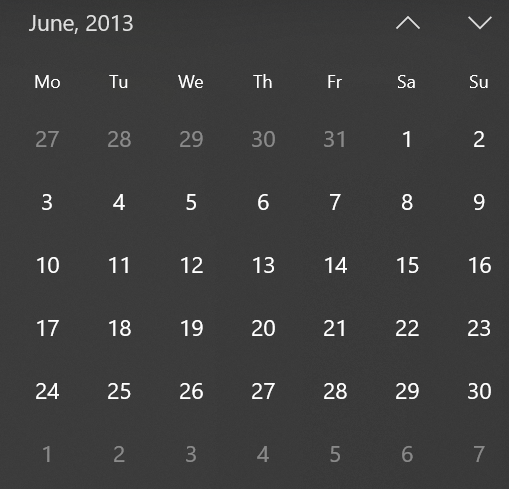

In [34]:
def week_no(day):
    #considering 1,2 as week 1
    day = int(day)
    if day <10:
        return 1
    elif day >=10 and day <17:
        return 2
    elif day >=17 and day <24:
        return 3
    else:
        return 4

In [35]:
# Checking the trend for the week
df_news['WEEK'] = df_news['DAY_OF_MONTH'].apply(week_no)

df_weeks = pd.DataFrame(df_news.groupby(['WEEK'])['NEWS'].apply(combine_text))

In [36]:
df_week_trending = df_weeks['NEWS'].apply(lambda x: trending(x,20,1))

In [37]:
df_week_trending = pd.DataFrame(df_week_trending).reset_index()
df_week_trending.to_csv('Week_wise_trend.csv')

In [38]:
df_week_trending.head()

,WEEK,NEWS
0,1,"[baseload, bond, click, company, gaspool, high..."
1,2,"[baseload, bond, click, company, gaspool, high..."
2,3,"[baseload, bond, buy, click, company, dec, gas..."
3,4,"[bond, buy, click, company, gaspool, high, jul..."


### Trend by Month (Overall Trend)

In this dataset we have more than 700mb of data and this gives the trending words for the entire dataset. In this case the data is spread over June 2013 hence all trending news from june are showcased here and file is created for the same.

In [39]:
df_news['month'] = 'June'
df_month = pd.DataFrame(df_news.groupby(['month'])['NEWS'].apply(combine_text))

In [40]:
df_month_trending = df_month['NEWS'].apply(lambda x: trending(x,20,1))

In [41]:
df_month_trending = pd.DataFrame(df_month_trending).reset_index()
df_month_trending.to_csv('overall_trend.csv')

In [42]:
df_month_trending.head()

,month,NEWS
0,June,"[baseload, bond, buy, click, company, gaspool,..."


In [45]:
# Convert seconds
import datetime

end = time.time()
run_time = end - start
print(f'Time taken to run the whole notebook is {str(datetime.timedelta(seconds=run_time))}')

Time taken to run the whole notebook is 6:37:13.464236


## Conclusion

From the initial research and run, we could find the top 20 trending words in each spectrum, and we could see still many trivial words are showing up after including STOP WORDS in the English language. Here comes the domain expert's role in analyzing those trending words, figuring out those familiar words, and adding them to stop words for the next run. With this iterative approach, we can improve the efficiency of this process.

For now, we have explicitly used built-in and user-defined functions in cleaning and preprocessing. This can be tedious and needs some tuning and manual run when a new and different dataset comes in. We need to implement Pipelines and construct it in a way each dataset goes through a definite set of processes automatically and creates output files in each instance of the lifecycle.

For this project, we have set the trending word limit as the top 20 in each spectrum, and this can be easily modified by passing different arguments to the method. For now, we have used individual words. Based on the need, we can increase the tendency to pick 2-3 word combination (bigram, trigram) to give actual meaning to the trending news like "presidential election results" being a trending topic worldwide during this month. Likewise, the output can be formed using a Mentimeter with live clouds where the representation can be more visualized and interactive. We have not done this part inorder to decrease this runtime for project submission. If needed just by increasing the n_grams value from 1 to 3 this can be achieved.We are creating individual output files in each spectrum thereby it will serve the purpose of sharing easy.